## **Tratamento dos Dados**

### **Dicionário "plants.csv"**

| Nome da Coluna | Descrição                                                                 |
|----------------|---------------------------------------------------------------------------|
| common name    | Nome da planta na região local                                           |
| family         | Informa a família da planta                                              |
| categories     | Categoria da família                                                     |
| origin         | Origem da planta, onde foi encontrada ou cultivada pela primeira vez     |
| climate        | Clima adequado para a planta                                             |
| zone           | Latitudes e longitudes                                                  |
| img_url        | URL de uma imagem da planta                                              |


Referência dos Dados:
- https://www.kaggle.com/datasets/iottech/plant/data
- https://pmc.ncbi.nlm.nih.gov/articles/PMC10220692/

### **Tratamento**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [91]:
data = pd.read_csv('../datasets/plants.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head(20)

,common_name,family,categories,origin,climate,zone,img_url
0,Janet Craig,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
1,Lady palm,Arecaceae,Palm,China,Subtropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...
2,"Tailflower , Wax flower",Araceae,Anthurium,Cultivar,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...
3,Elephant ear,Araceae,Other,Hybrid,Tropical humid,[11],http://www.tropicopia.com/house-plant/thumbnai...
4,Malaysian Dracaena,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
5,Chinese Evergreen,Araceae,Aglaonema,Hybrid,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...
6,Malaysian Dracaena,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
7,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
8,Guzmania,Bromeliaceae,Bromeliad,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
9,Chinese Evergreen,Araceae,Aglaonema,Hybrid,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...


In [92]:
data['family'] = data['family'].str.strip()
data['categories'] = data['categories'].str.strip()
data['origin'] = data['origin'].str.strip()
data['climate'] = data['climate'].str.strip()
data['img_url'] = data['img_url'].str.strip()

In [93]:

na_values = data.isnull().sum()
duplicated_values = data['common_name'].duplicated().sum()

print(f"Missing values:\n{na_values}")
print(f"\nDuplicated values: {duplicated_values}")


Missing values:
common_name    21
family          0
categories      0
origin          2
climate         0
zone            0
img_url         0
dtype: int64

Duplicated values: 222


In [94]:
# Remove duplicated values
data = data.drop_duplicates(subset=['common_name']).reset_index(drop=True)

In [95]:
data.dropna(subset=['common_name'], inplace=True)
data['origin'].fillna('Unknown', inplace=True)
missing_values = data.isnull().sum()
print(f"\nMissing values:\n{missing_values}")


Missing values:
common_name    0
family         0
categories     0
origin         0
climate        0
zone           0
img_url        0
dtype: int64


C:\Users\carli\AppData\Local\Temp\ipykernel_23656\132734782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['origin'].fillna('Unknown', inplace=True)


In [96]:
data['name'] = data['common_name'].str.split(' , ').str[0]
data['name'] = data['name'].str.strip()
data

,common_name,family,categories,origin,climate,zone,img_url,name
0,Janet Craig,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Janet Craig
1,Lady palm,Arecaceae,Palm,China,Subtropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...,Lady palm
2,"Tailflower , Wax flower",Araceae,Anthurium,Cultivar,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...,Tailflower
3,Elephant ear,Araceae,Other,Hybrid,Tropical humid,[11],http://www.tropicopia.com/house-plant/thumbnai...,Elephant ear
4,Malaysian Dracaena,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Malaysian Dracaena
...,...,...,...,...,...,...,...,...
128,Medallion Calathea,Marantaceae,Foliage plant,Hybrid,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...,Medallion Calathea
129,Japanese tassel fern,Dryopteridaceae,Fern,Japan,Subtropical,"[10, 6]",http://www.tropicopia.com/house-plant/thumbnai...,Japanese tassel fern
130,Willow fig tree,Moraceae,Ficus,Cultivar,Tropical,"[11,9]",http://www.tropicopia.com/house-plant/thumbnai...,Willow fig tree
131,"Thread Agave , Century plant",Amaryllidaceae,Cactus & Succulent,Mexico,Arid Tropical,"[10, 8]",http://www.tropicopia.com/house-plant/thumbnai...,Thread Agave


In [97]:
origin_values = data['origin'].value_counts()
origin_values

origin
Cultivar                   35
Brazil                     13
Mexico                     11
Japan                       6
South Africa                5
Madagascar                  5
Asia                        5
China                       4
Hybrid                      4
Malaysia                    3
India                       3
Australia                   3
Unknown                     2
Venezuela                   2
Canaries                    2
New Calidonia               2
South Pacific               2
Ecuador                     2
Philippines                 2
Central America             2
Africa                      2
Central Africa              2
Mediterranean               1
Guyana                      1
Honduras                    1
Zimbabwe                    1
Taiwan                      1
Korea                       1
Indonisia                   1
Ouest Africa                1
Colombia                    1
Dominica                    1
Java                        1
Rod

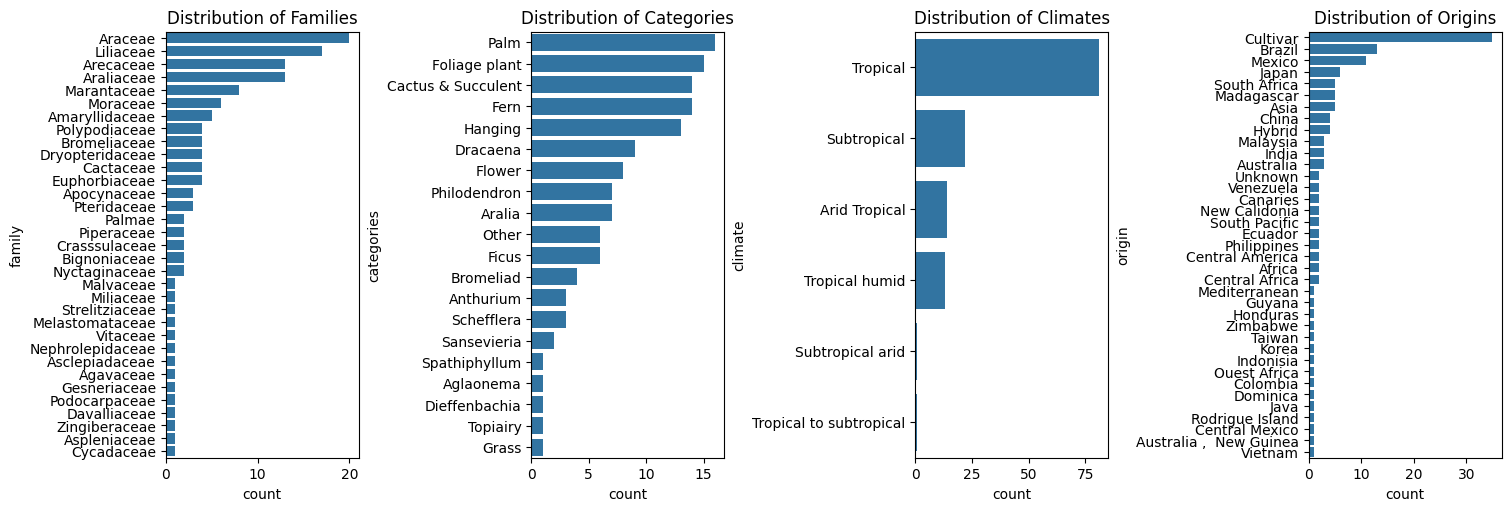

In [98]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)


axes[0].set_title('Distribution of Families')
sns.countplot(data=data, y='family', order=data['family'].value_counts().index, ax=axes[0])

axes[1].set_title('Distribution of Categories')
sns.countplot(data=data, y='categories', order=data['categories'].value_counts().index, ax=axes[1])

axes[2].set_title('Distribution of Climates')
sns.countplot(data=data, y='climate', order=data['climate'].value_counts().index, ax=axes[2])

axes[3].set_title('Distribution of Origins')
sns.countplot(data=data, y='origin', order=data['origin'].value_counts().index, ax=axes[3])


plt.show()

## **Estudo das Plantas do Dataset**

### **Populares no Brasil** 

Referências: 
- *https://www.picturethisai.com/region/Brazil.html*
- *https://revistacasaejardim.globo.com/paisagismo/noticia/2020/09/15-plantas-mais-populares-no-google-em-2020-e-dicas-de-cuidados.ghtml*

Selecionando os paises de origem das plantas mais populares do brasil de acordo com as referências acima




In [99]:

pop_countries_list = ['Brazil', 'Mexico', 'Venezuela', 'Ecuador', 'Central America', 'Colombia', 'Central Mexico', 'Madacascar', 'Central Africa', 'South Africa', 'Asia']

pop_plants = data[data['origin'].isin(pop_countries_list)].reset_index(drop=True)
pop_plants['common_name'].value_counts()


pop_plants.head()


,common_name,family,categories,origin,climate,zone,img_url,name
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Herringbone
1,"Bella palm , Neanthebella palm , Dwarf palm",Arecaceae,Palm,Mexico,Tropical,"[11,11]",http://www.tropicopia.com/house-plant/thumbnai...,Bella palm
2,"Fabian Aralia , Red Aralia",Araliaceae,Aralia,Asia,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia
3,Snake plant,Liliaceae,Sansevieria,South Africa,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Snake plant
4,"Parlor ivy , Sweetheart plant , Heartleaf ...",Araceae,Philodendron,Central America,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy


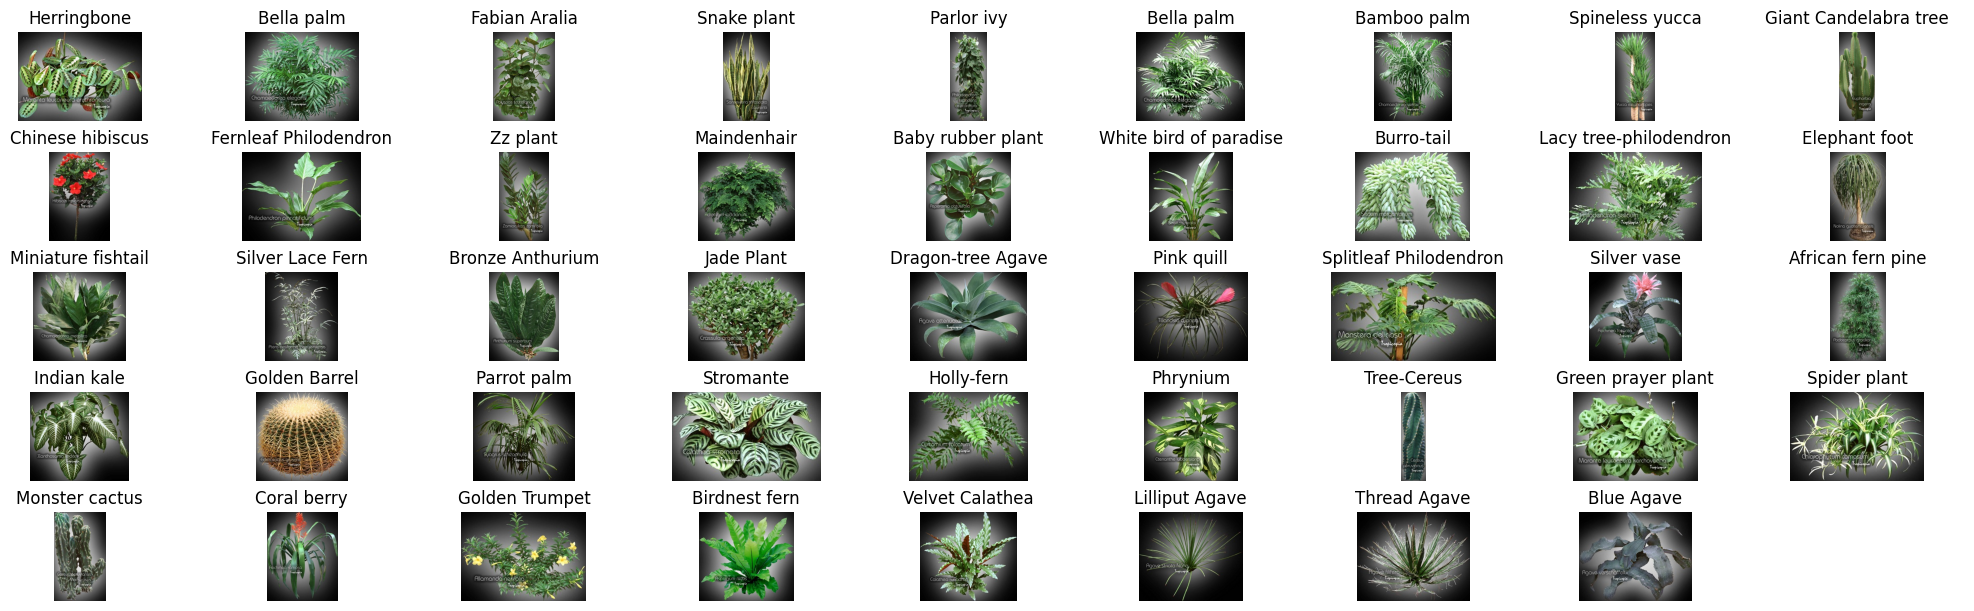

In [100]:
from PIL import Image
import urllib.request


images = []
for i in range(len(pop_plants)):
    url = pop_plants['img_url'][i]
    with urllib.request.urlopen(url) as response:
        img = np.array(Image.open(response))
        images.append(img)


fig, axes = plt.subplots(5, 9, figsize=(20, 6), constrained_layout=True)
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i])
        ax.set_title(pop_plants['name'][i])
        ax.axis('off')
    else:
        ax.axis('off')  
plt.show()




### **Frequência de Rega**

Essa classificação foi baseada no clima da planta e pela sua categoria

Referência Utilizada:
https://www.wekivafoliage.com/blogs/plant-care/how-to-create-a-watering-schedule-for-your-indoor-plants



In [101]:
pop_plants['water_category'] = np.where(pop_plants['categories'] == 'Cactus & Succulent', '2-4 weeks',
                                    np.where(pop_plants['climate'].isin(['Tropical', 'Tropical humid']), 'weekly', '7-10 days'))

pop_plants.head(20)

,common_name,family,categories,origin,climate,zone,img_url,name,water_category
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly
1,"Bella palm , Neanthebella palm , Dwarf palm",Arecaceae,Palm,Mexico,Tropical,"[11,11]",http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly
2,"Fabian Aralia , Red Aralia",Araliaceae,Aralia,Asia,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly
3,Snake plant,Liliaceae,Sansevieria,South Africa,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly
4,"Parlor ivy , Sweetheart plant , Heartleaf ...",Araceae,Philodendron,Central America,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly
5,"Bella palm , Neanthebella palm , Dwarf pal...",Arecaceae,Palm,Mexico,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly
6,"Bamboo palm , Reed Palm",Arecaceae,Palm,Mexico,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Bamboo palm,weekly
7,"Spineless yucca , Palm lily",Liliaceae,Dracaena,Mexico,Subtropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...,Spineless yucca,7-10 days
8,Giant Candelabra tree,Euphorbiaceae,Cactus & Succulent,South Africa,Arid Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Giant Candelabra tree,2-4 weeks
9,Chinese hibiscus,Malvaceae,Flower,Asia,Tropical,"[11,12]",http://www.tropicopia.com/house-plant/thumbnai...,Chinese hibiscus,weekly


In [102]:
pop_plants['water_category'].value_counts()

water_category
weekly       27
2-4 weeks     9
7-10 days     8
Name: count, dtype: int64

### **Venenosas para Animais**

Essa classificação foi feita de maneira generalizada baseada nas famílias das plantas.

Referências:

1. **ASPCA (American Society for the Prevention of Cruelty to Animals)**  
   - Link: [ASPCA - Toxic and Non-Toxic Plants](https://www.aspca.org/pet-care/animal-poison-control/toxic-and-non-toxic-plants)

2. **Pet Poison Helpline**  
   - Link: [Pet Poison Helpline - Poisonous Plants](https://www.petpoisonhelpline.com/poisons/)

3. **NCBI (National Center for Biotechnology Information)**  
   - Article: [Toxicity of Plants Containing Calcium Oxalate Crystals](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10220692/)

4. **VCA Animal Hospitals**  
   - Link: [VCA - Poisonous Plants](https://vcahospitals.com/know-your-pet/poisonous-plants)

5. **RHS (Royal Horticultural Society)**  
   - Link: [RHS - Potentially Harmful Garden Plants](https://www.rhs.org.uk/advice/profile?pid=524)

As famílias de plantas conhecidas por serem venenosas para pets incluem:

1. **Araceae** - Muitas plantas dessa família, como a Dieffenbachia, são tóxicas para cães e gatos.
2. **Amaryllidaceae** - Plantas como o Narciso (Daffodil) são tóxicas para pets.
3. **Liliaceae** - Muitas plantas dessa família, incluindo lírios, são altamente tóxicas para gatos.
4. **Euphorbiaceae** - Plantas como a Poinsettia são conhecidas por serem tóxicas para pets.
5. **Apocynaceae** - Algumas plantas dessa família, como a Oleander, são tóxicas para cães e gatos.


In [103]:
pop_plants['family'].value_counts()

family
Araceae            7
Marantaceae        5
Arecaceae          5
Amaryllidaceae     4
Bromeliaceae       3
Liliaceae          3
Cactaceae          3
Crasssulaceae      2
Araliaceae         1
Polypodiaceae      1
Malvaceae          1
Euphorbiaceae      1
Agavaceae          1
Strelitziaceae     1
Piperaceae         1
Pteridaceae        1
Podocarpaceae      1
Dryopteridaceae    1
Apocynaceae        1
Aspleniaceae       1
Name: count, dtype: int64

In [104]:
pop_plants['venomous'] = np.where(pop_plants['family'].isin(['Araceae', 'Euphorbiaceae', 'Liliaceae', 'Amaryllidaceae', 'Apocynaceae']), 1, 0)
pop_plants['venomous'].value_counts()

venomous
0    28
1    16
Name: count, dtype: int64

In [105]:
pop_plants['ind_pets'] = np.where(pop_plants['venomous'] == 1, 0, 1)
pop_plants['ind_pets'].value_counts()

ind_pets
1    28
0    16
Name: count, dtype: int64

In [106]:
pop_plants['name'].unique()

array(['Herringbone', 'Bella palm', 'Fabian Aralia', 'Snake plant',
       'Parlor ivy', 'Bamboo palm', 'Spineless yucca',
       'Giant Candelabra tree', 'Chinese hibiscus',
       'Fernleaf Philodendron', 'Zz plant', 'Maindenhair',
       'Baby rubber plant', 'White bird of paradise', 'Burro-tail',
       'Lacy tree-philodendron', 'Elephant foot', 'Miniature fishtail',
       'Silver Lace Fern', 'Bronze Anthurium', 'Jade Plant',
       'Dragon-tree Agave', 'Pink quill', 'Splitleaf Philodendron',
       'Silver vase', 'African fern pine', 'Indian kale', 'Golden Barrel',
       'Parrot palm', 'Stromante', 'Holly-fern', 'Phrynium',
       'Tree-Cereus', 'Green prayer plant', 'Spider plant',
       'Monster cactus', 'Coral berry', 'Golden Trumpet', 'Birdnest fern',
       'Velvet Calathea', 'Lilliput Agave', 'Thread Agave', 'Blue Agave'],
      dtype=object)

### **Tamanho das Plantas**

As classificações de tamanho das plantas no `size_mapping` foram baseadas em informações gerais de botânica e horticultura, incluindo características conhecidas das plantas mencionadas, como altura, porte e hábito de crescimento. As fontes utilizadas para essa categorização incluem:

1. **Royal Horticultural Society (RHS)**  
   - [RHS - Plant Finder](https://www.rhs.org.uk/plants)  
   A RHS fornece informações detalhadas sobre o tamanho e os cuidados com diversas plantas.

2. **Missouri Botanical Garden**  
   - [Missouri Botanical Garden - Plant Finder](https://www.missouribotanicalgarden.org/plantfinder/plantfindersearch.aspx)  
   Este site é uma referência confiável para informações sobre o porte e as características de plantas.

3. **Gardening Know How**  
   - [Gardening Know How - Plant Care](https://www.gardeningknowhow.com/)  
   Um recurso popular para informações sobre cuidados com plantas, incluindo o tamanho esperado.

4. **PictureThis AI**  
   - [PictureThis - Plant Identification and Care](https://www.picturethisai.com/)  
   Um aplicativo que identifica plantas e fornece informações sobre seu tamanho e cuidados.


In [107]:
def classify_plant_size(data):
    size_mapping = {
        "small": [
            "Herringbone", "Bella palm", "Snake plant", "Parlor ivy", "Baby rubber plant", 
            "Burro-tail", "Miniature fishtail", "Silver Lace Fern", "Bronze Anthurium", 
            "Jade Plant", "Pink quill", "Green prayer plant", "Spider plant", 
            "Velvet Calathea", "Lilliput Agave", "Thread Agave"
        ],
        "medium": [
            "Fabian Aralia", "Bamboo palm", "Zz plant", "Maindenhair", "White bird of paradise", 
            "Lacy tree-philodendron", "Elephant foot", "Splitleaf Philodendron", "Silver vase", 
            "Stromante", "Holly-fern", "Phrynium", "Coral berry", "Birdnest fern"
        ],
        "big": [
            "Spineless yucca", "Chinese hibiscus", "Fernleaf Philodendron", 
            "Dragon-tree Agave", "African fern pine", "Indian kale", "Golden Barrel", 
            "Parrot palm", "Tree-Cereus", "Monster cactus", "Golden Trumpet", "Blue Agave"
        ],
        "very big": [
            "Giant Candelabra tree", "Lacy tree-philodendron", "White bird of paradise"
        ]
    }


    def map_size(name):
        for size, plants in size_mapping.items():
            if name in plants:
                return size
        return "unknown" 

    data["size"] = data["name"].apply(map_size)
    return data


selected_plants = classify_plant_size(pop_plants)
selected_plants.head()

,common_name,family,categories,origin,climate,zone,img_url,name,water_category,venomous,ind_pets,size
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small
1,"Bella palm , Neanthebella palm , Dwarf palm",Arecaceae,Palm,Mexico,Tropical,"[11,11]",http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small
2,"Fabian Aralia , Red Aralia",Araliaceae,Aralia,Asia,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium
3,Snake plant,Liliaceae,Sansevieria,South Africa,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small
4,"Parlor ivy , Sweetheart plant , Heartleaf ...",Araceae,Philodendron,Central America,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small


In [108]:
selected_plants['size'].value_counts()

size
small       17
medium      14
big         12
very big     1
Name: count, dtype: int64

### **Ambiente Indicado**

Classificando se a planta é indicada ou não para apartamento a partir do seu tamanho

In [109]:
selected_plants['ind_apartment'] = np.where(selected_plants['size'].isin(['small', 'medium']), 1, 0)
selected_plants.head()

,common_name,family,categories,origin,climate,zone,img_url,name,water_category,venomous,ind_pets,size,ind_apartment
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,1
1,"Bella palm , Neanthebella palm , Dwarf palm",Arecaceae,Palm,Mexico,Tropical,"[11,11]",http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,1
2,"Fabian Aralia , Red Aralia",Araliaceae,Aralia,Asia,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,1
3,Snake plant,Liliaceae,Sansevieria,South Africa,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,1
4,"Parlor ivy , Sweetheart plant , Heartleaf ...",Araceae,Philodendron,Central America,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small,1


In [110]:
selected_plants['ind_apartment'].value_counts()

ind_apartment
1    31
0    13
Name: count, dtype: int64

### **Solo Ideal**

A classificação do solo ideal de cada planta foi feita de maneira generalizada a partir de suas família, mesmo que tenha algumas espécies que sejam exceções.

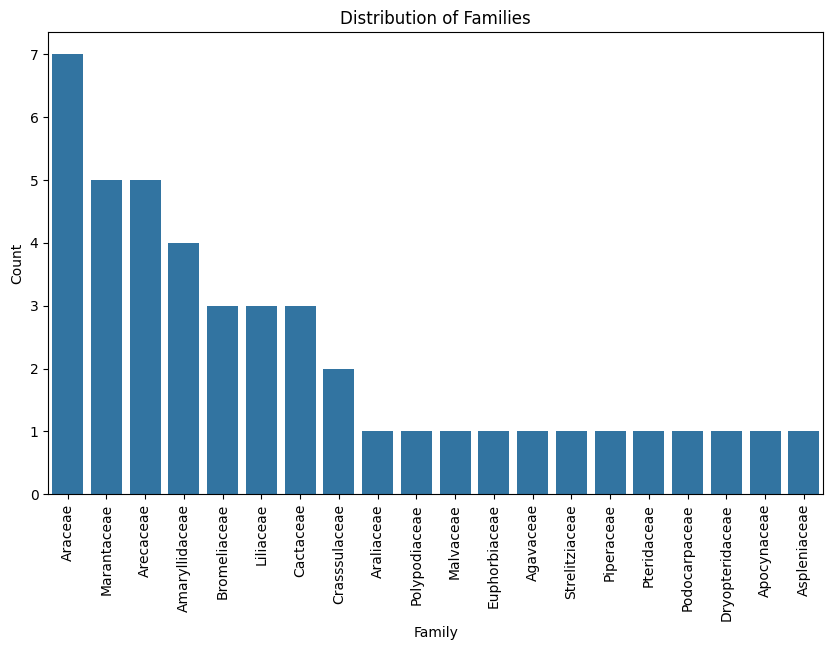

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_plants, x='family', order=selected_plants['family'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Families')
plt.xlabel('Family')
plt.ylabel('Count')

plt.show()

In [112]:
soil_mapping = {
    "Araceae": "Silty and clay soils",
    "Marantaceae": "Peat soils",
    "Arecaceae": "Sandy soils",
    "Amaryllidaceae": "Loamy soils",
    "Bromeliaceae": "Sandy soils",
    "Liliaceae": "Loamy soils",
    "Cactaceae": "Sandy soils",
    "Crasssulaceae": "Sandy soils",
    "Araliaceae": "Loamy soils",
    "Polypodiaceae": "Peat soils",
    "Malvaceae": "Loamy soils",
    "Euphorbiaceae": "Sandy soils",
    "Agavaceae": "Sandy soils",
    "Strelitziaceae": "Loamy soils",
    "Piperaceae": "Peat soils",
    "Pteridaceae": "Peat soils",
    "Podocarpaceae": "Silty and clay soils",
    "Crypteridaceae": "Peat soils",
    "Apocynaceae": "Sandy soils",
    "Aspleniaceae": "Peat soils",
    "Dryopteridaceae": "Silty and clay soils"
}


In [113]:
selected_plants['soil'] = selected_plants['family'].map(soil_mapping)
selected_plants['soil'].value_counts()

soil
Sandy soils             16
Loamy soils             10
Peat soils               9
Silty and clay soils     9
Name: count, dtype: int64

### **Luz Solar**


As informações sobre a quantidade de luz solar necessária para as famílias de plantas foram baseadas em conhecimentos gerais de botânica e horticultura, além de fontes confiáveis que fornecem diretrizes sobre cuidados com plantas. Referências:

1. **Royal Horticultural Society (RHS)**  
   - [RHS - Plant Care](https://www.rhs.org.uk/advice)  
   A RHS é uma referência confiável para informações sobre cuidados com plantas, incluindo requisitos de luz solar.

2. **Missouri Botanical Garden**  
   - [Missouri Botanical Garden - Plant Finder](https://www.missouribotanicalgarden.org/plantfinder/plantfindersearch.aspx)  
   Este site fornece informações detalhadas sobre as necessidades de luz de várias plantas.

3. **Gardening Know How**  
   - [Gardening Know How - Plant Care](https://www.gardeningknowhow.com/)  
   Um recurso popular para cuidados com plantas, incluindo requisitos de luz solar.

4. **PictureThis AI**  
   - [PictureThis - Plant Identification and Care](https://www.picturethisai.com/)  
   Um aplicativo que identifica plantas e fornece informações sobre suas necessidades de luz.

In [114]:
sunlight_mapping = {
    "Araceae": "Partial shade",
    "Marantaceae": "Partial shade",
    "Arecaceae": "Full sun",
    "Amaryllidaceae": "Full sun or partial shade",
    "Bromeliaceae": "Full sun or partial shade",
    "Liliaceae": "Full sun",
    "Cactaceae": "Full sun",
    "Crasssulaceae": "Full sun",
    "Araliaceae": "Partial shade",
    "Polypodiaceae": "Partial shade",
    "Malvaceae": "Full sun",
    "Euphorbiaceae": "Full sun",
    "Agavaceae": "Full sun",
    "Strelitziaceae": "Full sun",
    "Piperaceae": "Partial shade",
    "Pteridaceae": "Partial shade",
    "Podocarpaceae": "Full sun or partial shade",
    "Crypteridaceae": "Partial shade",
    "Apocynaceae": "Full sun",
    "Aspleniaceae": "Partial shade",
    "Dryopteridaceae": "Partial shade"
}


In [115]:
selected_plants['sunlight'] = selected_plants['family'].map(sunlight_mapping)
selected_plants['sunlight'].value_counts()

sunlight
Partial shade                18
Full sun                     18
Full sun or partial shade     8
Name: count, dtype: int64

## **Codificando as Classes**

Codificação das classes categoricas para melhores manipulações e utilizações em cenários de ML

In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


coded_plants = selected_plants.copy()

coded_plants['water_category_code'] = encoder.fit_transform(coded_plants['water_category'])
water_codes = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

coded_plants['size_code'] = encoder.fit_transform(coded_plants['size'])
size_codes = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

coded_plants['soil_code'] = encoder.fit_transform(coded_plants['soil'])
soil_codes = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

coded_plants['sunlight_code'] = encoder.fit_transform(coded_plants['sunlight'])
sunlight_codes = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [117]:
print("Water Category:")
water_codes

Water Category:


{'2-4 weeks': np.int64(0), '7-10 days': np.int64(1), 'weekly': np.int64(2)}

In [118]:
print("Size Category:")
size_codes


Size Category:


{'big': np.int64(0),
 'medium': np.int64(1),
 'small': np.int64(2),
 'very big': np.int64(3)}

In [119]:
print("Soil Category:")
soil_codes

Soil Category:


{'Loamy soils': np.int64(0),
 'Peat soils': np.int64(1),
 'Sandy soils': np.int64(2),
 'Silty and clay soils': np.int64(3)}

In [120]:
print("Sunlight Category:")
sunlight_codes

Sunlight Category:


{'Full sun': np.int64(0),
 'Full sun or partial shade': np.int64(1),
 'Partial shade': np.int64(2)}

In [121]:
coded_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   common_name          44 non-null     object
 1   family               44 non-null     object
 2   categories           44 non-null     object
 3   origin               44 non-null     object
 4   climate              44 non-null     object
 5   zone                 44 non-null     object
 6   img_url              44 non-null     object
 7   name                 44 non-null     object
 8   water_category       44 non-null     object
 9   venomous             44 non-null     int64 
 10  ind_pets             44 non-null     int64 
 11  size                 44 non-null     object
 12  ind_apartment        44 non-null     int64 
 13  soil                 44 non-null     object
 14  sunlight             44 non-null     object
 15  water_category_code  44 non-null     int64 
 16  size_code 

## **Resultados**

In [122]:
df_plants = coded_plants.drop(columns=['img_url', 'common_name', 'zone'])
df_plants.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2


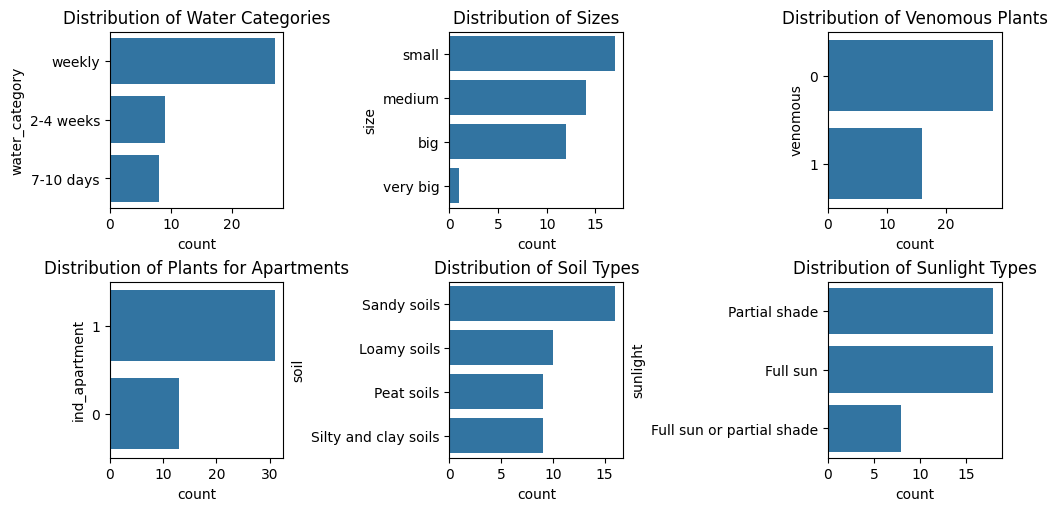

In [123]:

fig, axes = plt.subplots(2, 3, figsize=(10, 5), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

axes[0].set_title('Distribution of Water Categories')
sns.countplot(data=df_plants, y='water_category', order=df_plants['water_category'].value_counts().index, ax=axes[0])

axes[1].set_title('Distribution of Sizes')
sns.countplot(data=df_plants, y='size', order=df_plants['size'].value_counts().index, ax=axes[1])

axes[2].set_title('Distribution of Venomous Plants')
sns.countplot(data=df_plants, y='venomous', order=df_plants['venomous'].value_counts().index, ax=axes[2])

axes[3].set_title('Distribution of Plants for Apartments')
sns.countplot(data=df_plants, y='ind_apartment', order=df_plants['ind_apartment'].value_counts().index, ax=axes[3])

axes[4].set_title('Distribution of Soil Types')
sns.countplot(data=df_plants, y='soil', order=df_plants['soil'].value_counts().index, ax=axes[4])

axes[5].set_title('Distribution of Sunlight Types')
sns.countplot(data=df_plants, y='sunlight', order=df_plants['sunlight'].value_counts().index, ax=axes[5])

plt.show()

In [124]:
df_plants.to_csv('../datasets/plants_model.csv', index=False)
df_plants.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2


| Coluna               | Descrição                                             |
|----------------------|-------------------------------------------------------|
| family               | Família da planta                                    |
| categories           | Categorias da planta                                 |
| origin               | Origem da planta                                     |
| climate              | Clima da planta                                      |
| name                 | Nome comum da planta                                 |
| water_category       | Frequência de rega (semanal, 7-10 dias, 2-4 semanas) |
| venomous             | Venenosa ou não (1 ou 0)                             |
| size                 | Tamanho da planta (pequeno, médio, grande, muito grande) |
| ind_apartment        | Indicada para apartamentos (1) ou não (0)            |
| soil                 | Tipo de solo ideal para a planta                     |
| sunlight             | Necessidade de luz solar                             |
| water_category_code  | Código da frequência de rega                         |
| size_code            | Código do tamanho                                    |
| soil_code            | Código do tipo de solo                               |
| sunlight_code        | Código da necessidade de luz solar                   |

